In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bill = pd.read_csv(r"C:\Users\Balakrishna_Vema\Documents\Data science\Data sets\Bill (1).csv")

In [3]:
bill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9462 entries, 0 to 9461
Data columns (total 7 columns):
cust_id             9462 non-null int64
act_active_dt       9462 non-null object
package_id          9456 non-null float64
bill_zip            9462 non-null int64
customer_segment    9358 non-null object
status              9462 non-null object
bill_amt            9462 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 517.6+ KB


In [4]:
round(bill.describe(),2)

,cust_id,package_id,bill_zip,bill_amt
count,9.462000e+03,9456.00,9462.00,9462.00
mean,7.218331e+09,582365.35,560574.87,3786.69
std,3.339774e+09,137662.17,6539.06,36902.20
min,1.008001e+09,109.00,560.00,-2058340.52
25%,8.065764e+09,610487.00,560005.00,243.82
50%,9.243210e+09,614984.00,560037.00,703.37
75%,9.243391e+09,618402.00,560075.00,1466.02
max,1.860266e+10,630846.00,600001.00,2498793.82


In [5]:
bill_numerical = bill._get_numeric_data()

In [91]:
round(bill_numerical, 2)

,cust_id,package_id,bill_zip,bill_amt
0,9243148228,54518.0,560095,561.80
1,9243264060,617691.0,580029,224.35
2,8951061271,616488.0,560037,1689.04
3,8951033996,616488.0,560062,344.04
4,9241079722,614975.0,560017,478.33
...,...,...,...,...
9457,9243300397,618381.0,560070,1106.18
9458,9243300657,615031.0,560043,674.16
9459,9243301205,618403.0,560016,772.02
9460,9243500761,629978.0,560100,842.70


In [92]:
q1 = bill_numerical.quantile(0.25)
q3=bill_numerical.quantile(0.75)
iqr = q3-q1

In [93]:
round(pd.DataFrame(iqr)).T

,cust_id,package_id,bill_zip,bill_amt
0,1.177628e+09,7915.0,70.0,1222.0


In [101]:
lo = bill_numerical.quantile(0.25)-1.5*iqr
uo= bill_numerical.quantile(0.75)+1.5*iqr
print("lower outlier cut off \n", lo)
print("\n")
print("upper outlier cut off \n", uo)

lower outlier cut off 
 cust_id       6.299322e+09
package_id    5.986145e+05
bill_zip      5.599000e+05
bill_amt     -1.589479e+03
dtype: float64


upper outlier cut off 
 cust_id       1.100983e+10
package_id    6.302745e+05
bill_zip      5.601800e+05
bill_amt      3.299311e+03
dtype: float64


In [80]:
print("lower outlier cut of point is \n", format(lo))

lower outlier cut of point is 
 cust_id       6.299322e+09
package_id    5.986145e+05
bill_zip      5.599000e+05
bill_amt     -1.589479e+03
dtype: float64


AttributeError: 'NoneType' object has no attribute 'T'

In [18]:
lo

cust_id       6.299322e+09
package_id    5.986145e+05
bill_zip      5.599000e+05
bill_amt     -1.589479e+03
dtype: float64

In [19]:
uo = q3-1.5*iqr

In [20]:
uo

cust_id       7.476950e+09
package_id    6.065295e+05
bill_zip      5.599700e+05
bill_amt     -3.672812e+02
dtype: float64

In [21]:
bill_numerical.skew()

cust_id       -1.261003
package_id    -3.888731
bill_zip     -65.746059
bill_amt      15.441489
dtype: float64

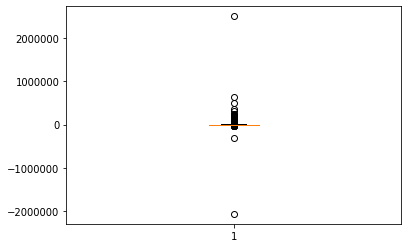

In [26]:
plt.boxplot(bill_numerical["bill_amt"])
plt.show()

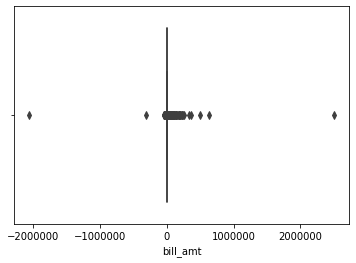

In [27]:
sns.boxplot(bill_numerical["bill_amt"])

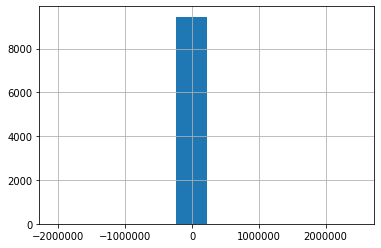

In [28]:
bill_numerical["bill_amt"].hist()

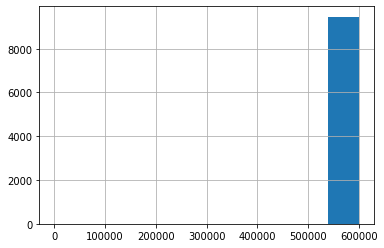

In [29]:
bill_numerical["bill_zip"].hist()

In [31]:
print(bill_numerical["bill_amt"].quantile(0.10))

0.0


In [32]:
print(bill_numerical["bill_amt"].quantile(0.90))

5698.52


In [34]:
bill_numerical["bill_amt"]=np.where(bill_numerical["bill_amt"]<0.0,bill_numerical["bill_amt"])

ValueError: either both or neither of x and y should be given

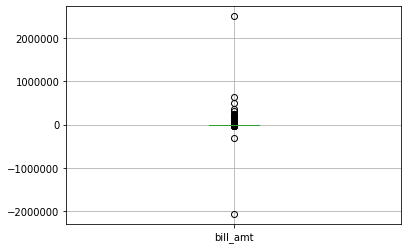

In [54]:
bill_numerical.boxplot(["bill_amt"])

In [104]:
bank_mark1 = pd.read_excel(r"C:\Users\Balakrishna_Vema\Documents\Data science\Data sets\bank_market1.xlsx")

In [105]:
bank_mark1

,age,balance,day,duration,campaign,pdays,previous,Unnamed: 7,Unnamed: 8
0,18,1944,10,122,3,-1,0,NaN,77795461.0
1,18,108,10,167,1,-1,0,NaN,NaN
2,18,608,12,267,1,-1,0,NaN,NaN
3,18,35,21,104,2,-1,0,NaN,NaN
4,18,5,24,143,2,-1,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
45206,93,775,22,860,2,177,7,NaN,NaN
45207,93,775,4,476,2,13,9,NaN,NaN
45208,94,1234,3,212,1,-1,0,NaN,NaN
45209,95,2282,21,207,17,-1,0,NaN,NaN


In [106]:
#find the duplicate values 
bank_mark1.shape

(45211, 9)

In [107]:
bank_mark1.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [143]:
data1 = pd.DataFrame(bank_mark1.isnull())

In [157]:
data2 = data1.fillna(0)

In [163]:
bank_mark1.dropna(axis=1, inplace=True)

In [164]:
bank_mark1

,age,balance,day,duration,campaign,pdays,previous
0,18,1944,10,122,3,-1,0
1,18,108,10,167,1,-1,0
2,18,608,12,267,1,-1,0
3,18,35,21,104,2,-1,0
4,18,5,24,143,2,-1,0
...,...,...,...,...,...,...,...
45206,93,775,22,860,2,177,7
45207,93,775,4,476,2,13,9
45208,94,1234,3,212,1,-1,0
45209,95,2282,21,207,17,-1,0


In [165]:
bank_mark1.isna().sum()

age         0
balance     0
day         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64

In [166]:
bank_mark1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [174]:
bank_mark1.duplicated().value_counts()

False    45210
True         1
dtype: int64

In [175]:
dup_value

False    45210
True         1
dtype: int64

In [179]:
bank_mark1.drop_duplicates(inplace=True)

In [180]:
bank_mark1.duplicated().value_counts()

False    45210
dtype: int64

In [181]:
bank_mark1

,age,balance,day,duration,campaign,pdays,previous
0,18,1944,10,122,3,-1,0
1,18,108,10,167,1,-1,0
2,18,608,12,267,1,-1,0
3,18,35,21,104,2,-1,0
4,18,5,24,143,2,-1,0
...,...,...,...,...,...,...,...
45206,93,775,22,860,2,177,7
45207,93,775,4,476,2,13,9
45208,94,1234,3,212,1,-1,0
45209,95,2282,21,207,17,-1,0


In [183]:
bank_mark1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45210.0,40.935855,10.618611,18.0,33.0,39.0,48.0,95.0
balance,45210.0,1362.302190,3044.792762,-8019.0,72.0,448.0,1428.0,102127.0
day,45210.0,15.806348,8.322555,1.0,8.0,16.0,21.0,31.0
duration,45210.0,258.166645,257.529545,0.0,103.0,180.0,319.0,4918.0
campaign,45210.0,2.763880,3.098044,1.0,1.0,2.0,3.0,63.0
pdays,45210.0,40.198739,100.129666,-1.0,-1.0,-1.0,-1.0,871.0
previous,45210.0,0.580336,2.303465,0.0,0.0,0.0,0.0,275.0


In [184]:
q1 = bank_mark1.quantile(0.25)
q3 = bank_mark1.quantile(0.75)
iqr = q3-q1

In [187]:
iqr

age           15.0
balance     1356.0
day           13.0
duration     216.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64

In [189]:
lo = q1-1.5*iqr
lo

age           10.5
balance    -1962.0
day          -11.5
duration    -221.0
campaign      -2.0
pdays         -1.0
previous       0.0
dtype: float64

In [197]:
lo = bank_mark1.quantile(0.25)-1.5*iqr
uo = bank_mark1.quantile(0.75)+1.5*iqr
print("lower outlier cut off \n", lo)
print("\n")
print("upper outlier cutt off \n", uo)

lower outlier cut off 
 age           10.5
balance    -1962.0
day          -11.5
duration    -221.0
campaign      -2.0
pdays         -1.0
previous       0.0
dtype: float64


upper outlier cutt off 
 age           70.5
balance     3462.0
day           40.5
duration     643.0
campaign       6.0
pdays         -1.0
previous       0.0
dtype: float64


In [198]:
bank_mark1.skew()

age          0.684886
balance      8.360244
day          0.093103
duration     3.144288
campaign     4.898615
pdays        2.615675
previous    41.846063
dtype: float64

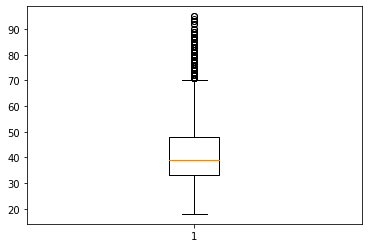

In [199]:
plt.boxplot(bank_mark1["age"])
plt.show()

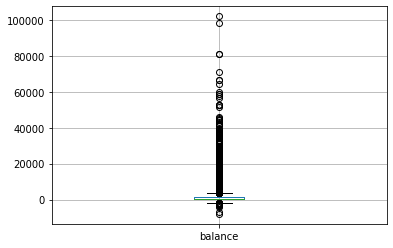

In [201]:
bank_mark1.boxplot(column="balance")

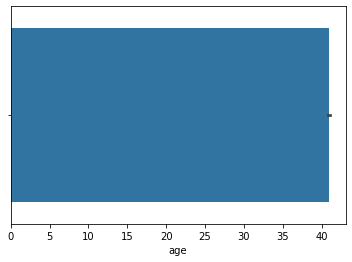

In [202]:
sns.barplot(bank_mark1["age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d7df463688>,
 'caps': [<matplotlib.lines.Line2D at 0x1d7df463f48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d7ddf7db48>],
 'medians': [<matplotlib.lines.Line2D at 0x1d7ddf81688>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d7ddf86a88>],
 'means': []}

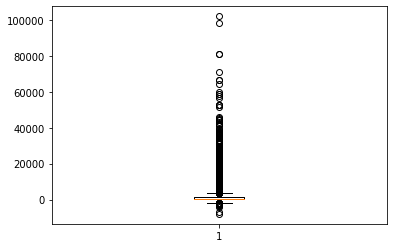

In [203]:
plt.boxplot(bank_mark1["balance"])

(array([ 1336., 11747., 12925.,  8015.,  7066.,  3311.,   377.,   303.,
          116.,    14.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <a list of 10 Patch objects>)

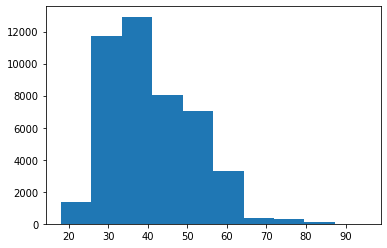

In [204]:
#hitogram
plt.hist(bank_mark1["age"])

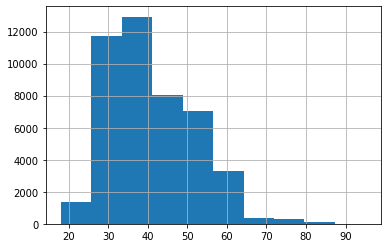

In [205]:
bank_mark1["age"].hist()

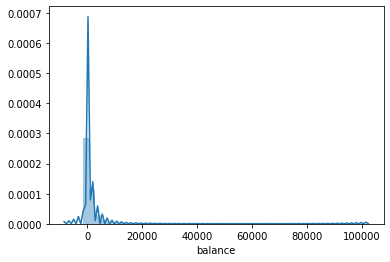

In [207]:
sns.distplot(bank_mark1["balance"])

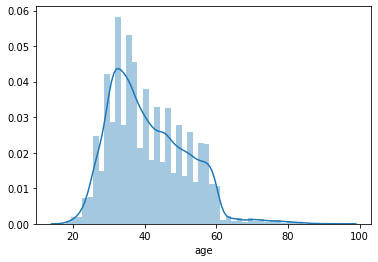

In [208]:
sns.distplot(bank_mark1["age"])

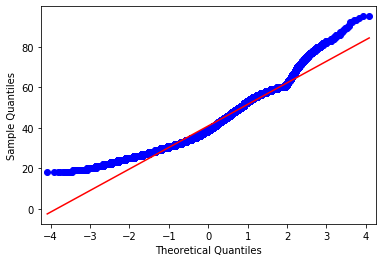

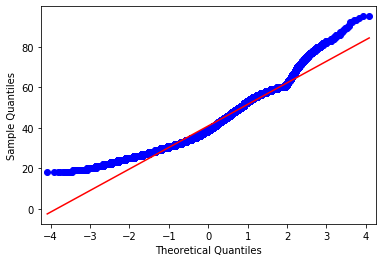

In [209]:
from statsmodels.graphics.gofplots import qqplot
qqplot(bank_mark1["age"], line="s")

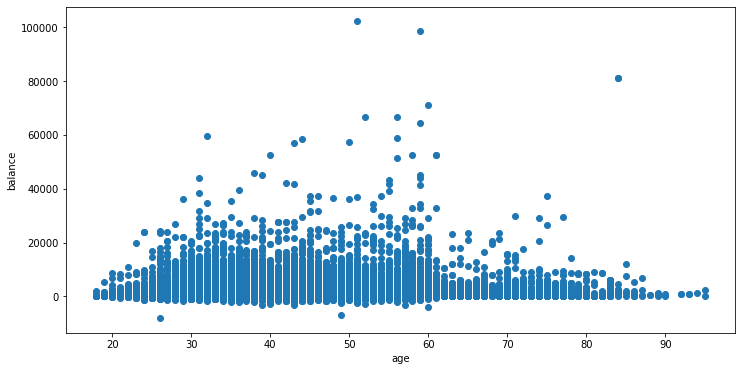

In [213]:
fig,ax = plt.subplots(figsize=(12,6))
ax.scatter(bank_mark1["age"], bank_mark1["balance"])
ax.set_xlabel("age")
ax.set_ylabel("balance")
plt.show()

In [221]:
#how to trate the outliers:
#Capping-90th percentile and floaring- 10th percentile
bank_mark1["balance"].skew()

8.36024369125418

In [222]:
print(bank_mark1["balance"].quantile(0.10))
print(bank_mark1["balance"].quantile(0.90))

0.0
3574.0999999999985


In [224]:
bank_mark1["balance"]=np.where(bank_mark1["balance"]<0, 0,bank_mark1["balance"])
bank_mark1["balance"]=np.where(bank_mark1["balance"]>3574,3574,bank_mark1["balance"])

In [225]:
bank_mark1["balance"].skew()

1.2328670598394658

In [227]:
np.sqrt(bank_mark1["balance"]).skew()

0.46823217519731286

In [ ]:
np.cov(air1[""])